In [2]:
import pandas as pd
import numpy as np

In [3]:
files = !ls output | grep palco_2010

In [4]:
files

['palco_2010 ISGD results_matrix dfu_average.csv',
 'palco_2010 ISGD results_matrix dfu_median.csv',
 'palco_2010 ISGD results_matrix dfu_none.csv',
 'palco_2010 ISGD results_matrix dfu_random.csv',
 'palco_2010 RAISGD results_matrix dfu_average.csv',
 'palco_2010 RAISGD results_matrix dfu_median.csv',
 'palco_2010 RAISGD results_matrix dfu_none.csv',
 'palco_2010 RAISGD results_matrix dfu_random.csv',
 'palco_2010 RSISGD results_matrix dfu_average.csv',
 'palco_2010 RSISGD results_matrix dfu_median.csv',
 'palco_2010 RSISGD results_matrix dfu_none.csv',
 'palco_2010 RSISGD results_matrix dfu_random.csv',
 'palco_2010-10_cp-results_matrix.csv',
 'palco_2010-30_cp-results_matrix.csv',
 'palco_2010-30_recs-results_matrix.csv',
 'palco_2010-50_recs-results_matrix.csv']

In [5]:
results = [ pd.read_csv(f'output/{file}').to_numpy() for file in files ][:12]

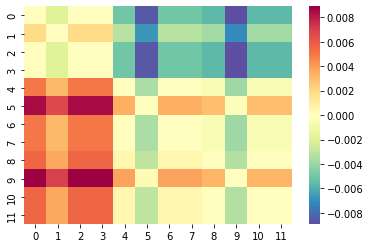

In [6]:
mean_diff_matrix = np.zeros(shape=( len(results), len(results) ) )
for i in range( len(results) ):
        for j in range(len(results) ):
            mean_diff = (results[i] - results[j]).mean()
            mean_diff_matrix[i, j] = mean_diff
import seaborn as sns
sns.heatmap( mean_diff_matrix , cmap='Spectral_r' );

In [7]:
top_result = mean_diff_matrix.sum(axis=1).argmax()
top_result

9

In [8]:
files[top_result]

'palco_2010 RSISGD results_matrix dfu_median.csv'

In [102]:
def find_top_result(results, top_result=0):
    for i in range( top_result, len(results) ):
        for j in range(i+1, len(results) ):
            mean_diff = (results[i] - results[j]).mean()
            print(i,j)
            if mean_diff>=0:
                top_result = i
                if j == len(results)-1:
                    return top_result, 1
            else:
                top_result = j
                top_result, flag = find_top_result(results, top_result=top_result)
                if flag:
                    return top_result, flag

find_top_result(results, top_result=0)


0 1
1 2
1 3
1 4
4 5
5 6
5 7
5 8
5 9
9 10
9 11


(9, 1)